In [1]:
# Debugging the training

In [1]:
import torch
from math import pi,sqrt,log,e,exp
from time import time
from matplotlib import pyplot
import numpy as np
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
dtype = torch.float
device = torch.device("cuda:0")

from src.models.flows.coupling_cells.real_nvp import RealNVP
from src.models.flows.sampling import FactorizedFlowPrior
from src.models.flows.analytic_flows.element_wise import AnalyticSigmoid

In [2]:
prior_mu =  torch.tensor(0.).to(device)
prior_sig =  torch.tensor(1.2).to(device)
prior = torch.distributions.normal.Normal(prior_mu,prior_sig)

sampler = FactorizedFlowPrior(d=2,prior_1d=prior)

In [3]:
nvp = RealNVP(d=2,
              mask=[True,False],
              d_hidden=10,
              n_hidden=5,).to(device)

sig = AnalyticSigmoid(d=2)

In [104]:
def f(x):
    return torch.exp(- torch.sum(x**2,(-1,) ))

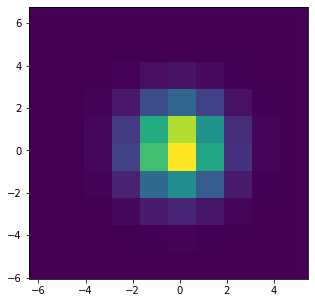

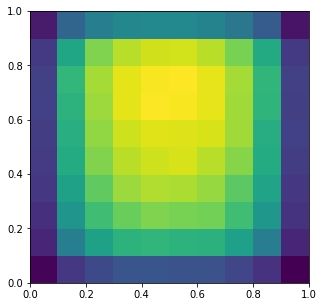

In [105]:
batch_size = 1000000
x=sampler(batch_size)
y=nvp(x)
z=sig(y)
y=y.detach().cpu().numpy()
z=z.detach().cpu().numpy()
plt.figure(figsize=(5,5))
plt.hist2d(y[:,0],y[:,1])
plt.show()
plt.figure(figsize=(5,5))
plt.hist2d(z[:,0],z[:,1],range=((0,1),(0,1)))
plt.show()

In [76]:
nvp1 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=100,
              n_hidden=10,).to(device)
nvp2 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=100,
              n_hidden=10,).to(device)
nvp3 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=100,
              n_hidden=10,).to(device)
nvp4 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=100,
              n_hidden=10,).to(device)

optim = torch.optim.Adam(list(nvp1.parameters())+list(nvp2.parameters())+list(nvp3.parameters())+list(nvp4.parameters()),lr=1.e-5)

In [129]:
nvp1 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=500,
              n_hidden=10,).to(device)
nvp2 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=500,
              n_hidden=10,).to(device)
nvp3 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=500,
              n_hidden=10,).to(device)
nvp4 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=500,
              n_hidden=10,).to(device)

optim = torch.optim.Adam(list(nvp1.parameters())+list(nvp2.parameters())+list(nvp3.parameters())+list(nvp4.parameters()),lr=1.e-5)

batch_size=100000
Ls=[]
for i in range(1000):
    optim.zero_grad()
    x=sampler(batch_size)
    x=nvp1(x)
    x=nvp2(x)
    x=nvp3(x)
    x=nvp4(x)
    z=sig(x)
    lj=-(z[:,-1])
    L=torch.mean(-torch.log(f(z[:,:-1]))+lj)
    if i>11 and L.detach().cpu().item() > np.mean(Ls[-10:])+3*np.std(Ls[-10:]):
        Ls.append(L.detach().cpu().item())
        break
    Ls.append(L.detach().cpu().item())
    L.backward()
    optim.step()
    
plt.plot(Ls)
plt.show()
print(Ls[-1])

RuntimeError: CUDA out of memory. Tried to allocate 192.00 MiB (GPU 0; 10.76 GiB total capacity; 8.74 GiB already allocated; 51.25 MiB free; 8.94 GiB reserved in total by PyTorch)

In [130]:
batch_size = 100000
x=sampler(batch_size)
x=nvp1(x)
x=nvp2(x)
x=nvp3(x)
x=nvp4(x)
z=sig(x)
z=z.detach().cpu().numpy()
plt.figure(figsize=(5,5))
plt.hist2d(z[:,0],z[:,1],range=((0,1),(0,1)))
plt.show()

RuntimeError: CUDA out of memory. Tried to allocate 192.00 MiB (GPU 0; 10.76 GiB total capacity; 8.75 GiB already allocated; 51.25 MiB free; 8.94 GiB reserved in total by PyTorch)